In [ ]:
#print all output
pd.options.display.max_seq_items = 2000

In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import variation
from matplotlib.ticker import MaxNLocator

from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV,Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


import os
import psutil
import json
from termcolor import colored
import seaborn as sns
from tqdm import tqdm
import timeit
import time
# import pickle
import joblib

from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,mutual_info_regression
from statsmodels.distributions.empirical_distribution import ECDF

#Evaluation
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
warnings.filterwarnings('ignore', 'Objective did not converge.*')

#Avoiding Type 3 fonts in matplotlib plots
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
font = {'size'   : 40}

matplotlib.rc('font', **font)
matplotlib.rc('lines', linewidth=3.0)
matplotlib.rc('lines', markersize=10)

In [106]:
#read the metrics and target values from local files
mat=pd.read_pickle('QoE_metrics_VoD(CQM_ITUT)_13952.pkl')
# mat=pd.read_pickle('QoE_metrics_VoD(CMQ_ITUT)_13952.pkl')
mat=mat.rename(columns={'QoE_ITUT':'QoE'})

mat=mat.fillna(0)
X=mat.iloc[:,-(mat.shape[1]-2):]

Y=mat['QoE']
#drop columns which have same values in all rows
X=X.drop(X.std()[(X.std() == 0)].index, axis=1)
maxnum_feature=X.shape[1]
print(X.shape)
X

(13952, 96)


,average_Downlink CQI,average_Uplink CQI,average_Measured RTT,average_UE Throughput UL,average_eNB Throughput UL,average_UE Throughput DL,average_Smoothed RTT,average_eNB Throughput DL,min_Downlink CQI,min_Uplink CQI,...,skew_Smoothed RTT,skew_eNB Throughput DL,sem_Downlink CQI,sem_Uplink CQI,sem_Measured RTT,sem_UE Throughput UL,sem_eNB Throughput UL,sem_UE Throughput DL,sem_Smoothed RTT,sem_eNB Throughput DL
swimMovementFP_ds0_nm_160_cli0_vec,15.0,13.0,0.127928,0.015651,2.353467,0.636493,120.092819,47.201458,15.0,13.0,...,1.886137,-1.354610,0.0,0.0,0.051180,0.001501,0.017891,0.061428,14.698971,0.363510
swimMovementFP_ds0_nm_160_cli101_vec,15.0,4.0,0.026862,0.005493,2.353467,0.197729,20.617754,47.201458,15.0,4.0,...,-0.608048,-1.354610,0.0,0.0,0.003380,0.000454,0.017891,0.016517,1.657770,0.363510
swimMovementFP_ds0_nm_160_cli102_vec,15.0,6.0,0.029088,0.006067,2.353467,0.218561,23.269429,47.201458,15.0,6.0,...,-1.187334,-1.354610,0.0,0.0,0.002831,0.000564,0.017891,0.020604,1.315702,0.363510
swimMovementFP_ds0_nm_160_cli104_vec,15.0,11.0,0.045309,0.026277,2.353467,1.218006,41.462836,47.201458,15.0,11.0,...,1.872888,-1.354610,0.0,0.0,0.015284,0.002402,0.017891,0.109406,3.350247,0.363510
swimMovementFP_ds0_nm_160_cli105_vec,15.0,15.0,0.083095,0.019411,2.353467,0.920070,79.681602,47.201458,15.0,15.0,...,2.166904,-1.354610,0.0,0.0,0.042576,0.001722,0.017891,0.079896,9.326708,0.363510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
swimMovementFP_ds9_nm_80_cli76_vec,15.0,15.0,0.096685,0.031779,1.800826,1.541809,84.132245,36.293424,15.0,15.0,...,1.933486,-0.325786,0.0,0.0,0.045301,0.003353,0.019678,0.159657,9.738605,0.402736
swimMovementFP_ds9_nm_80_cli77_vec,15.0,7.0,0.039028,0.016946,1.800826,0.781816,36.483449,36.293424,15.0,7.0,...,2.165498,-0.325786,0.0,0.0,0.014125,0.001669,0.019678,0.076159,2.983669,0.402736
swimMovementFP_ds9_nm_80_cli78_vec,15.0,15.0,0.193722,0.030866,1.800826,1.502565,190.649952,36.293424,15.0,15.0,...,0.875950,-0.325786,0.0,0.0,0.066195,0.002922,0.019678,0.138687,17.450348,0.402736
swimMovementFP_ds9_nm_80_cli79_vec,15.0,6.0,0.131889,0.002301,1.800826,0.082752,23.297763,36.293424,15.0,6.0,...,2.958265,-0.325786,0.0,0.0,0.111016,0.000369,0.019678,0.013509,14.592524,0.402736


In [ ]:
s=pd.read_csv('QoE_metrics_VoD(CQM_ITUT)_13952.csv',index_col=0)
s

In [6]:
'''No Type Dataset'''
#read the metrics and target values from local files
# mat=pd.read_pickle('QoE_4788.pkl')
mat=pd.read_pickle('QoE_13952.pkl')
mat=mat.rename(columns={'OverallScore':'QoE'})
mat=mat.fillna(0)
X=mat.iloc[:,-(mat.shape[1]-2):]

Y=mat['QoE']
#drop columns which have same values in all rows
# X=X.drop(X.std()[(X.std() == 0)].index, axis=1)
maxnum_feature=X.shape[1]
X.shape

(13952, 96)

In [8]:
'''Old VoD dataset which pre-processed without add the last stalling event for the interrupted client'''
#read the metrics and target values from local files
# mat=pd.read_pickle('QoE_4788.pkl')
mat_old=pd.read_pickle('QoE_13952.pkl')
mat_old=mat_old.rename(columns={'OverallScore':'QoE'})
mat_old=mat_old.fillna(0)
X_old=mat_old.iloc[:,-(mat_old.shape[1]-2):]

Y_old=mat_old['QoE']
#drop columns which have same values in all rows
# X=X.drop(X.std()[(X.std() == 0)].index, axis=1)
maxnum_feature_old=X_old.shape[1]
X_old.shape

(13952, 96)

In [3]:
'''clients which played video time is more than the threshold'''
#read the metrics and target values from local files
# mat=pd.read_pickle('QoE_4788.pkl')
mat_over25=pd.read_pickle('QoE_10678_over25segs.pkl')
mat_over25=mat_over25.fillna(0)
X_over25=mat_over25.iloc[:,-(mat_over25.shape[1]-2):]

Y_over25=mat_over25['QoE']
#drop columns which have same values in all rows
# X=X.drop(X.std()[(X.std() == 0)].index, axis=1)
maxnum_feature=X_over25.shape[1]
X_over25.shape

(10678, 96)

In [19]:
'''
Read the data the data related to UE DL Throughput
'''
mat=pd.read_pickle('QoE_10678_over25segs_UEDLTP.pkl')
mat=mat.rename(columns={'OverallScore':'QoE'})
X=mat.iloc[:,:-1]

Y=mat['QoE']
#drop columns which have same values in all rows
# X=X.drop(X.std()[(X.std() == 0)].index, axis=1)
maxnum_feature=X.shape[1]
X.shape

(10678, 12)

In [5]:
# '''
# clients which played video time is more than the threshold (the threshold is 125s(25segments) for now)
# '''

# clients_overSegs25=pd.read_csv('clients_overSegs25.csv') 
# #convert the dataframe to list
# s=clients_overSegs25['0'].tolist()
# #select all rows according to the clients list
# QoE_10678_over25segs=mat.loc[s]
# QoE_10678_over25segs.to_pickle('QoE_10678_over25segs.pkl')


In [8]:
df['daychange']<8) & (df['daychange']>2

4.6151114829731235

In [17]:
Y[(Y<2.5) & (Y>1)].shape

(9151,)

In [74]:
Y_test[Y_test>2.5].shape

(637,)

In [70]:
Y.shape

(10678,)

In [72]:
Y_test.shape

(2136,)

In [14]:
Y[Y>1].nsmallest(2)

swimMovementFP_ds1_p1_s0-100_160_cli47_vec     1.745985
swimMovementFP_ds0_p1_s0-100_160_cli104_vec    1.745985
Name: QoE, dtype: float64

In [32]:
# Y=pd.read_pickle('QoE_metrics_VoD(CQM_ITUT)_13952.pkl')['QoE_CQM']
Y=pd.read_pickle('QoE_metrics_VoD(CQM_ITUT)_13952.pkl')['QoE_ITUT']
stationary=Y.filter(like='_nm_', axis=0)
moving=Y.drop(Y.filter(like='_nm_', axis=0).index)
low=Y[Y<=2]
medium=Y[(Y<3.5) & (Y>2)]
high=Y[Y>=3.5]
print(len(Y),Y.mean(),Y.std(),Y.max(),Y.min())
print(len(stationary),stationary.mean(),stationary.std(),stationary.max(),stationary.min())
print(len(moving),moving.mean(),moving.std(),moving.max(),moving.min())
print(len(low),low.mean(),low.std(),low.max(),low.min())
print(len(medium),medium.mean(),medium.std(),medium.max(),medium.min())
print(len(high),high.mean(),high.std(),high.max(),high.min())

13952 2.1834172811890533 0.596785931651379 4.6151114829731235 1.7459625097968012
3210 2.4082857625264107 0.8234853822022937 4.6151114829731235 1.7495302831100328
10742 2.1162204998547653 0.49027053726828534 4.608298345086925 1.7459625097968012
8095 1.8293243674894641 0.06834133729649489 1.999972962068698 1.7459625097968012
5067 2.4630084768779703 0.38691213226873233 3.499916930819612 2.0002120413413627
790 4.018472405040231 0.35810607680749895 4.6151114829731235 3.5006314055079217


In [33]:
pd.DataFrame([[len(Y),Y.mean(),Y.std(),Y.max(),Y.min()],
            [len(stationary),stationary.mean(),stationary.std(),stationary.max(),stationary.min()],
            [len(moving),moving.mean(),moving.std(),moving.max(),moving.min()],
            [len(low),low.mean(),low.std(),low.max(),low.min()],
            [len(medium),medium.mean(),medium.std(),medium.max(),medium.min()],
            [len(high),high.mean(),high.std(),high.max(),high.min()]]).to_csv('test.csv')

## store the file which shows the predicted QoE vs. the actual QoE

In [20]:
#read the model1
cv_Lasso=joblib.load('model_over25_UEDLTP_Lasso_MSE.joblib')
cv_LRR=joblib.load('model_over25_UEDLTP_LRR_MSE.joblib')
cv_krr=joblib.load('model_over25_UEDLTP_krr_MSE.joblib')
cv_SVR=joblib.load('model_over25_UEDLTP_SVR_MSE.joblib')

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=17)
X_test.shape,Y_test.shape

((2136, 12), (2136,))

In [64]:
df_pre=pd.DataFrame([cv_Lasso.predict(X_test),cv_LRR.predict(X_test),cv_krr.predict(X_test),cv_SVR.predict(X_test)],index=['LASSO','LRR','KRR','SVR']).T
s=pd.concat([Y_test.reset_index(drop=True),df_pre.reset_index(drop=True)],axis=1)
s.index=Y_test.index
s.to_pickle('CQM QoE vs Predicted QoE by the model with all features.pkl')

## CDF of QoE

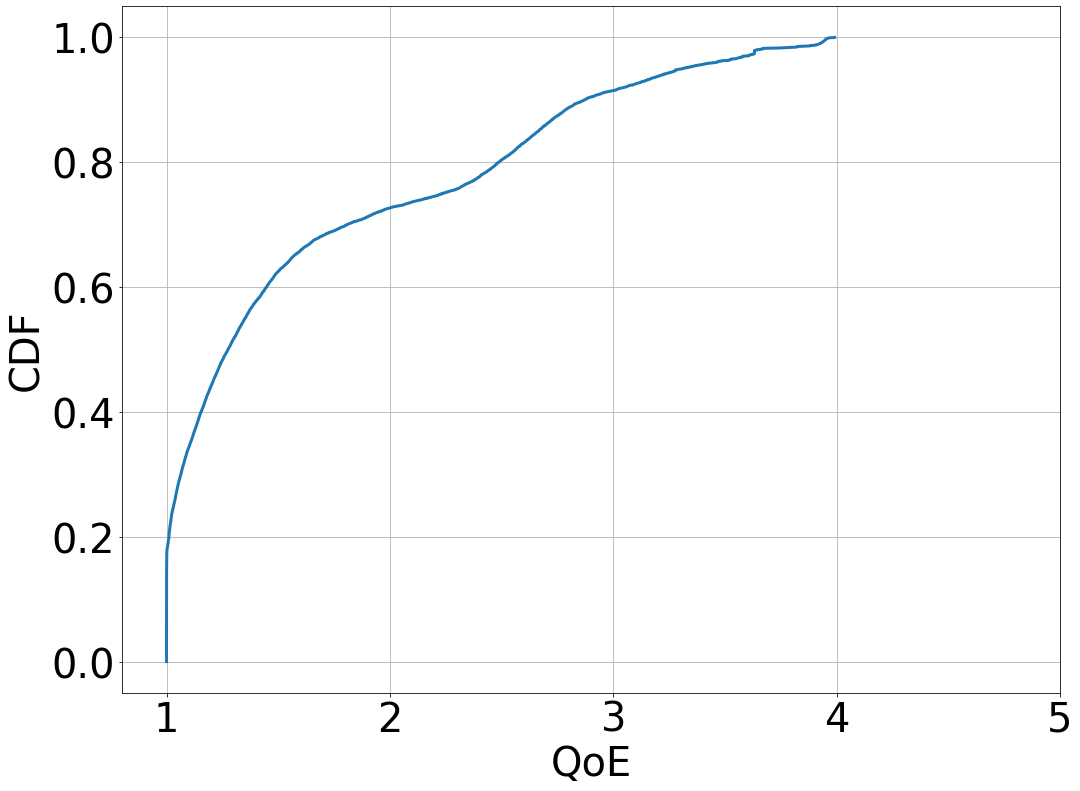

In [15]:
'''
CDF plot
'''
fig, ax = plt.subplots(figsize=(16,12))

sorted_data = np.sort(mat['QoE'])
linspaced = np.linspace(0, 1, len(mat['QoE']), endpoint=False)
ax.plot(sorted_data, linspaced, rasterized=False)
ax.grid(True)

plt.xlabel('QoE')
plt.ylabel('CDF')
# plt.title('CDF of QoE score')
# plt.show()
plt.xlim((0.8,5))
plt.tight_layout()
plt.savefig('CDF of CQM QoE in VoD.pdf',dpi=100, bbox_inches='tight')

In [26]:
def cdf_test(datalist,labels):
    fig, ax = plt.subplots(figsize=(16,12))
    re=pd.DataFrame()
    for i,data in enumerate(datalist):
        sorted_data = np.sort(data)
        linspaced = np.linspace(0, 1, len(data), endpoint=False)
        print(np.interp(3, sorted_data,linspaced))
        
        ax.plot(sorted_data, linspaced, 'o-',label=labels[i],rasterized=False,markersize=6)
        ax.grid(True)
    plt.xlabel('QoE')
    plt.ylabel('CDF')
#     plt.xticks(np.concatenate([np.arange(0,401,50),np.array([30])]))
    plt.legend()
#     plt.ylim((0,1))
    plt.xlim((0.8,5))
    plt.show()
    plt.tight_layout()
    fig.savefig('CDF of QoE in VoD(ITU-T vs CQM).pdf', dpi=100, bbox_inches='tight')

0.8988258357983895
0.9146045810016158


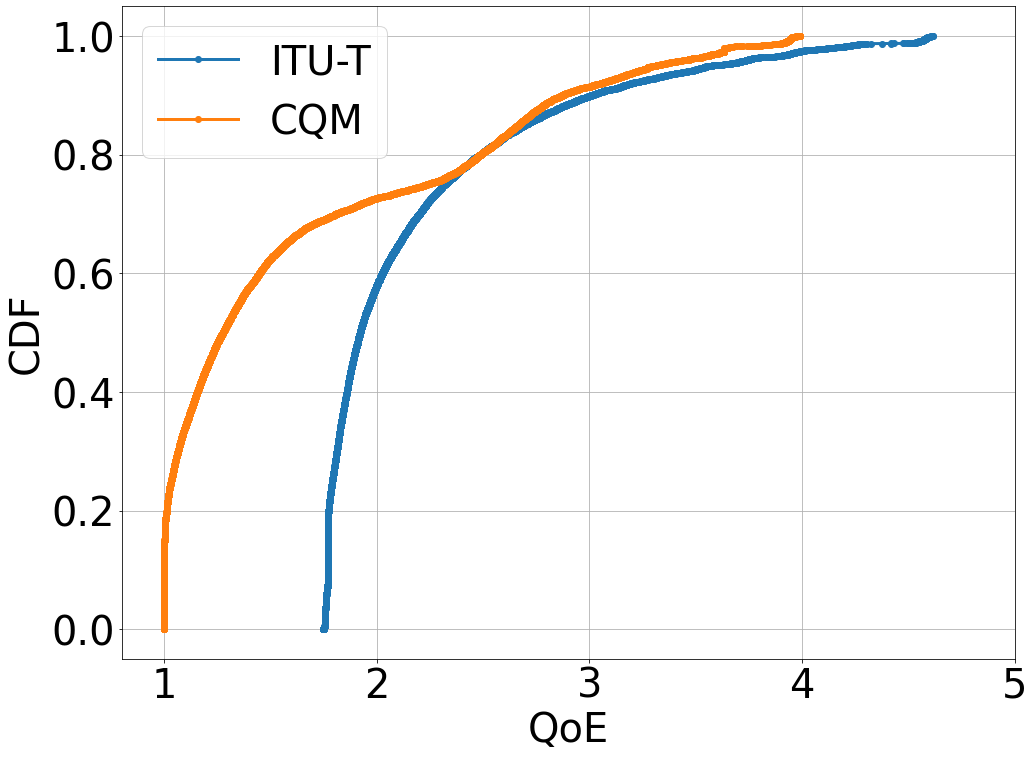

<Figure size 432x288 with 0 Axes>

In [27]:
Y_old=mat['QoE_ITUT']
cdf_test([Y_old,Y],['ITU-T','CQM'])

### Split the data into different speed of movements

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=17)

X_stationary=X_test.filter(like='_nm_', axis=0)
Y_stationary=Y_test.filter(like='_nm_', axis=0)

X_moving=X_test.drop(X_test.filter(like='_nm_', axis=0).index)
Y_moving=Y_test.drop(Y_test.filter(like='_nm_', axis=0).index)

X_pedestrians=X_moving.filter(regex='_s50-50_80_cli([0123]?[0-9]_)|_s100-0_|_s50-50_160_cli([01234567]?[0-9]_)',axis=0)
Y_pedestrians=Y_moving.filter(regex='_s50-50_80_cli([0123]?[0-9]_)|_s100-0_|_s50-50_160_cli([01234567]?[0-9]_)',axis=0)

X_vehicles=X_moving.filter(regex='_s50-50_80_cli(4[0-9]|[567][0-9]_)|_s0-100_|_s50-50_160_cli([89][0-9]|1[0-5][0-9])',axis=0)
Y_vehicles=Y_moving.filter(regex='_s50-50_80_cli(4[0-9]|[567][0-9]_)|_s0-100_|_s50-50_160_cli([89][0-9]|1[0-5][0-9])',axis=0)

X_test.shape,X_stationary.shape,X_moving.shape,X_pedestrians.shape,X_vehicles.shape


((2791, 96), (630, 96), (2161, 96), (1037, 96), (1124, 96))

In [ ]:
'''Split the data into different speed of movements '''
stationary=mat.filter(like='_nm_', axis=0)
X_stationary=stationary.iloc[:,1:]
Y_stationary=stationary['QoE']
X_stationary=X_stationary.drop(X_stationary.std()[(X_stationary.std() == 0)].index, axis=1)

moving=mat.drop(mat.filter(like='_nm_', axis=0).index)
X_moving=moving.iloc[:,1:]
Y_moving=moving['QoE']
X_moving=X_moving.drop(X_moving.std()[(X_moving.std() == 0)].index, axis=1)
X_stationary.shape,X_moving.shape

In [ ]:
X=X_moving
Y=Y_moving
maxnum_feature=X.shape[1]

In [ ]:
'''VoIP(Voice over Internet Protocal) dataset'''
#read the metrics and target values from local files
mat_VoIP=pd.read_pickle('QoE_5517_VoIP.pkl')
mat_VoIP=mat_VoIP.fillna(0)
X_VoIP=mat_VoIP.iloc[:,1:]

Y_VoIP=mat_VoIP['QoE']
#drop columns which have same values in all rows
X_VoIP=X_VoIP.drop(X_VoIP.std()[(X_VoIP.std() == 0)].index, axis=1)
maxnum_feature=X_VoIP.shape[1]
X_VoIP.shape

In [ ]:
'''VOD(Video on demand) and LIVE dataset'''
mat_vod=pd.read_pickle('QoE_281_VOD.pkl').rename(columns={'OverallScore':'QoE'}).fillna(0)
mat_live=pd.read_pickle('QoE_270_LIVE.pkl').rename(columns={'OverallScore':'QoE'}).fillna(0)
mat_vod.shape,mat_live.shape

## Select the data only contains certain features

In [7]:
# select the data related to UE DL Throughput
mat_UE_DL_TP=mat_over25[mat_over25.filter(regex='UE Throughput DL').columns]
mat2=mat_UE_DL_TP.join(mat_over25['QoE'], how='outer')
mat2

,average_UE Throughput DL,min_UE Throughput DL,max_UE Throughput DL,25percentile_UE Throughput DL,median_UE Throughput DL,75percentile_UE Throughput DL,std_UE Throughput DL,var_UE Throughput DL,cov_UE Throughput DL,kurt_UE Throughput DL,skew_UE Throughput DL,sem_UE Throughput DL,QoE
swimMovementFP_ds0_nm_160_cli0_vec,0.636493,0.0,9.341128,0.000000,0.023872,0.460364,1.408834,1.984812,2.211325,10.295794,3.106342,0.061428,2.238775
swimMovementFP_ds0_nm_160_cli101_vec,0.197729,0.0,4.706384,0.000000,0.056632,0.262774,0.404585,0.163689,2.044452,42.670828,5.497352,0.016517,1.783500
swimMovementFP_ds0_nm_160_cli102_vec,0.218561,0.0,6.986640,0.000000,0.083552,0.262592,0.503439,0.253451,2.301497,73.515760,7.287049,0.020604,1.785385
swimMovementFP_ds0_nm_160_cli104_vec,1.218006,0.0,13.862808,0.000000,0.344176,0.928872,2.247479,5.051162,1.843024,8.919458,2.811114,0.109406,3.732687
swimMovementFP_ds0_nm_160_cli105_vec,0.920070,0.0,10.362632,0.000000,0.226528,0.785276,1.649025,2.719284,1.790178,7.121853,2.540892,0.079896,3.349598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
swimMovementFP_ds9_nm_80_cli74_vec,3.051188,0.0,19.717504,0.000000,0.381952,5.765088,4.449063,19.794158,1.456142,0.785231,1.383745,0.232875,4.613179
swimMovementFP_ds9_nm_80_cli76_vec,1.541809,0.0,19.944672,0.011936,0.286464,0.834728,3.189140,10.170616,2.065848,9.121570,2.946150,0.159657,3.373244
swimMovementFP_ds9_nm_80_cli77_vec,0.781816,0.0,18.276864,0.000000,0.242616,0.615516,1.611982,2.598486,2.059541,35.624297,4.726777,0.076159,2.391311
swimMovementFP_ds9_nm_80_cli78_vec,1.502565,0.0,14.488592,0.023872,0.298212,0.987366,2.745862,7.539759,1.825117,6.061867,2.436424,0.138687,4.105616


In [8]:
mat2.to_pickle('QoE_10678_over25segs_UEDLTP.pkl')

In [ ]:
mat=mat.fillna(0)
X=mat.iloc[:,:-1]

Y=mat['QoE']
#drop columns which have same values in all rows
# X=X.drop(X.std()[(X.std() == 0)].index, axis=1)
maxnum_feature=X.shape[1]
X

### Lasso Regression
Linear Model trained with L1 prior as regularizer (aka the Lasso)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=17)

pipe_Lasso=Pipeline([('scale', StandardScaler()),('clf', Lasso())])
# alphas=[1e-9, 0.0001, 0.0003, 0.0005,0.00055,0.0006,0.00065,0.0007, 0.0008,0.0009,0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1]
alphas=[0.0001,0.0002,0.0003,0.0005,0.0007,0.001,0.005,0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1]
Lasso_params={'clf__alpha': alphas}
cv_Lasso = GridSearchCV(pipe_Lasso, param_grid=Lasso_params, cv=5, scoring='neg_mean_squared_error',n_jobs=-1, verbose=3,return_train_score=True)
start=time.time()
cv_Lasso.fit(X_train, Y_train)
#save the model
joblib.dump(cv_Lasso,'model_CQM_Lasso_MSE.joblib')

vcpu=psutil.cpu_percent()
print ('Total CPUs utilized percentage :',vcpu,'%')
finish=time.time()
print('the duration of training is:',finish-start)

print('Percentage of used RAM :',psutil.virtual_memory().percent,'%')

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   22.4s finished


Total CPUs utilized percentage : 50.7 %
the duration of training is: 23.770852088928223
Percentage of used RAM : 64.0 %


In [35]:
cv_Lasso=joblib.load('model_cv_Lasso_MSE.joblib')
print('Best parameters: {}'.format(cv_Lasso.best_params_))

Best parameters: {'clf__alpha': 0.0005}


In [37]:
#Get the MSE score for different type in the test dataset by applying the same model
print('All: ',mean_squared_error(Y_test,cv_Lasso.predict(X_test)))
print('stationary: ',mean_squared_error(Y_stationary,cv_Lasso.predict(X_stationary)))
print('moving: ',mean_squared_error(Y_moving,cv_Lasso.predict(X_moving)))
print('pedestrians: ',mean_squared_error(Y_pedestrians,cv_Lasso.predict(X_pedestrians)))
print('vehicles: ',mean_squared_error(Y_vehicles,cv_Lasso.predict(X_vehicles)))

All:  0.06698094205764775
stationary:  0.08492378969654446
moving:  0.061750033213360415
pedestrians:  0.05435027170676903
vehicles:  0.06857703737913913


In [36]:
print('Best validation score: {}'.format(cv_Lasso.best_score_))
print('Best parameters: {}'.format(cv_Lasso.best_params_))
start=time.time()
print('Test score: ',mean_squared_error(Y_test,cv_Lasso.predict(X_test)))
vcpu=psutil.cpu_percent()
print ('Total CPUs utilized percentage :',vcpu,'%')
finish=time.time()
print('the duration of test is:',finish-start)
print('Percentage of used RAM :',psutil.virtual_memory().percent,'%')

train_scores_mean = cv_Lasso.cv_results_["mean_train_score"]
test_scores_mean = cv_Lasso.cv_results_["mean_test_score"]
print('The training score of the best estimator: ',train_scores_mean[np.argmax(test_scores_mean)])

Best validation score: -0.06912046216715706
Best parameters: {'clf__alpha': 0.0003}
Test score:  0.06698094205764775
Total CPUs utilized percentage : 4.7 %
the duration of test is: 0.00956583023071289
Percentage of used RAM : 64.2 %
The training score of the best estimator:  -0.06767183632770972


In [ ]:
####Dataset is 4788
print('Best validation score: {}'.format(cv_Lasso.best_score_))
print('Best parameters: {}'.format(cv_Lasso.best_params_))
print('Test score: ',r2_score(Y_test,cv_Lasso.predict(X_test)))

train_scores_mean = cv_Lasso.cv_results_["mean_train_score"]
train_scores_std = cv_Lasso.cv_results_["std_train_score"]
test_scores_mean = cv_Lasso.cv_results_["mean_test_score"]
test_scores_std = cv_Lasso.cv_results_["std_test_score"]
print('The training score of the best estimator: ',train_scores_mean[np.argmax(test_scores_mean)])

plt.figure(figsize=(10,7))
# Set plot style
plt.style.use('seaborn')
plt.title('Validation Curve(Lasso Regression)')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('R2')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Training score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Validation score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

In [ ]:
#cv_Lasso.named_steps['clf'].coef_
coefs = pd.DataFrame(cv_Lasso.best_estimator_.steps[1][1].coef_, index=X_train.columns,columns=['value'])
print("Lasso picked ", np.sum(coefs != 0).value ," features and eliminated the other " , np.sum(coefs == 0).value, " features")
imp_coefs=coefs[coefs!=0].dropna().sort_values(by='value')
imp_coefs.plot(kind="barh",figsize=(7,12))
plt.show()
# cv_Lasso.best_estimator_.steps[1][1].coef_[cv_Lasso.best_estimator_.steps[1][1].coef_!=0]

### Linear Ridge Regression 
Linear least squares with l2 regularization.

In [44]:
%%time

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=17)

pipe_LRR = Pipeline([('scale', StandardScaler()),('clf', Ridge())])

# alphas=[1e-9,1e-8,1e-7,1e-6,1e-5,1e-4, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1, 0.3, 0.5, 0.7,1,5,7,10,100,500] 
alphas=[1e-4, 0.0003, 0.0005, 0.0007,0.001, 0.003, 0.005, 0.007,0.01,0.1,70] 

LRR_params ={'clf__alpha': alphas}

cv_LRR = GridSearchCV(pipe_LRR, param_grid=LRR_params, cv=5, scoring='neg_mean_squared_error',n_jobs=-1, verbose=3,return_train_score=True)
start=time.time()
cv_LRR.fit(X_train, Y_train)
#save the model
joblib.dump(cv_LRR,'model_CQM_LRR_MSE.joblib')

vcpu=psutil.cpu_percent()
print ('Total CPUs utilized percentage :',vcpu,'%')
finish=time.time()
print('the duration of training is:',finish-start)

print('Percentage of used RAM :',psutil.virtual_memory().percent,'%')

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.0s


Total CPUs utilized percentage : 36.9 %
the duration of training is: 4.0333569049835205
Percentage of used RAM : 66.7 %
CPU times: user 1.01 s, sys: 93.8 ms, total: 1.11 s
Wall time: 4.05 s


[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    3.8s finished


In [46]:
#Get the MSE score for different type in the test dataset by applying the same model
print('All: ',mean_squared_error(Y_test,cv_LRR.predict(X_test)))
print('stationary: ',mean_squared_error(Y_stationary,cv_LRR.predict(X_stationary)))
print('moving: ',mean_squared_error(Y_moving,cv_LRR.predict(X_moving)))
print('pedestrians: ',mean_squared_error(Y_pedestrians,cv_LRR.predict(X_pedestrians)))
print('vehicles: ',mean_squared_error(Y_vehicles,cv_LRR.predict(X_vehicles)))

All:  0.06312404837660893
stationary:  0.0789270533337478
moving:  0.058516971503403244
pedestrians:  0.05161448534543975
vehicles:  0.06488519049433575


In [37]:
cv_LRR=joblib.load('model_CQM_LRR_MSE.joblib')
print('Best parameters: {}'.format(cv_LRR.best_params_))

Best parameters: {'clf__alpha': 0.0001}


In [45]:
print('Best validation score: {}'.format(cv_LRR.best_score_))
print('Best parameters: {}'.format(cv_LRR.best_params_))
start=time.time()
print('Test score: ',mean_squared_error(Y_test,cv_LRR.predict(X_test)))
vcpu=psutil.cpu_percent()
print ('Total CPUs utilized percentage :',vcpu,'%')
finish=time.time()
print('the duration of test is:',finish-start)
print('Percentage of used RAM :',psutil.virtual_memory().percent,'%')

train_scores_mean = cv_LRR.cv_results_["mean_train_score"]
test_scores_mean = cv_LRR.cv_results_["mean_test_score"]
print('The training score of the best estimator: ',train_scores_mean[np.argmax(test_scores_mean)])


Best validation score: -0.06558946784201304
Best parameters: {'clf__alpha': 0.0001}
Test score:  0.06312404837660893
Total CPUs utilized percentage : 24.7 %
the duration of test is: 0.007996320724487305
Percentage of used RAM : 66.3 %
The training score of the best estimator:  -0.06378445681296452


In [ ]:
print('Best validation score: {}'.format(cv_LRR.best_score_))
print('Best parameters: {}'.format(cv_LRR.best_params_))
print('Test score: ',r2_score(Y_test,cv_LRR.predict(X_test)))

train_scores_mean = cv_LRR.cv_results_["mean_train_score"]
train_scores_std = cv_LRR.cv_results_["std_train_score"]
test_scores_mean = cv_LRR.cv_results_["mean_test_score"]
test_scores_std = cv_LRR.cv_results_["std_test_score"]

plt.figure(figsize=(10,7))
# Set plot style
plt.style.use('seaborn')
plt.title('Validation Curve(Linear Ridge Regression)')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('R2')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Training score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Validation score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

## Kernel Ridge Regression

#### RBF Kernel

In [52]:
%%time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=17)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KernelRidge())
])

param_grid = [
    {
        'clf__kernel': ['rbf'],
#         'clf__alpha': [0, 0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1, 0.3, 0.5, 0.7, 1, 3, 5, 10]
        'clf__alpha': [0.01, 0.03, 0.05, 0.07,0.1, 0.2,0.5, 0.7, 1,10]

    },
]


#scoring=neg_mean_squared_error
cv_krr = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1, verbose=3,return_train_score=True)
start=time.time()
cv_krr.fit(X_train, Y_train)
#save the model
joblib.dump(cv_krr,'model_CQM_krr_MSE.joblib')

vcpu=psutil.cpu_percent()
print ('Total CPUs utilized percentage :',vcpu,'%')
finish=time.time()
print('the duration of test is:',finish-start)
print('Percentage of used RAM :',psutil.virtual_memory().percent,'%')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  7.6min finished


Total CPUs utilized percentage : 92.8 %
the duration of test is: 472.01826095581055
Percentage of used RAM : 28.7 %
CPU times: user 21 s, sys: 1.75 s, total: 22.8 s
Wall time: 7min 52s


In [54]:
#Get the MSE score for different type in the test dataset by applying the same model
print('All: ',mean_squared_error(Y_test,cv_krr.predict(X_test)))
print('stationary: ',mean_squared_error(Y_stationary,cv_krr.predict(X_stationary)))
print('moving: ',mean_squared_error(Y_moving,cv_krr.predict(X_moving)))
print('pedestrians: ',mean_squared_error(Y_pedestrians,cv_krr.predict(X_pedestrians)))
print('vehicles: ',mean_squared_error(Y_vehicles,cv_krr.predict(X_vehicles)))

All:  0.05765112427975837
stationary:  0.07485071559042569
moving:  0.05263689821510291
pedestrians:  0.04486412397369146
vehicles:  0.05980804313355823


In [40]:
cv_krr=joblib.load('model_cv_krr_MSE.joblib')
print('Best parameters: {}'.format(cv_krr.best_params_))

Best parameters: {'clf__alpha': 0.03, 'clf__kernel': 'rbf'}


In [53]:
print('Best validation score: {}'.format(cv_krr.best_score_))
print('Best parameters: {}'.format(cv_krr.best_params_))
start=time.time()
print('Test score: ',mean_squared_error(Y_test,cv_krr.predict(X_test)))
vcpu=psutil.cpu_percent()
print ('Total CPUs utilized percentage :',vcpu,'%')
finish=time.time()
print('the duration of test is:',finish-start)
print('Percentage of used RAM :',psutil.virtual_memory().percent,'%')

train_scores_mean = cv_krr.cv_results_["mean_train_score"]
test_scores_mean = cv_krr.cv_results_["mean_test_score"]
print('The training score of the best estimator: ',train_scores_mean[np.argmax(test_scores_mean)])

Best validation score: -0.06443499825540126
Best parameters: {'clf__alpha': 0.07, 'clf__kernel': 'rbf'}
Test score:  0.05765112427975837
Total CPUs utilized percentage : 5.8 %
the duration of test is: 0.7514591217041016
Percentage of used RAM : 38.1 %
The training score of the best estimator:  -0.0339930702108747


In [ ]:
print('Best score: {}'.format(cv_krr.best_score_))
print('Best parameters: {}'.format(cv_krr.best_params_))

alphas=[0, 0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1, 0.3, 0.5, 0.7, 1, 3, 5, 10]
train_scores_mean = cv_krr.cv_results_["mean_train_score"]
train_scores_std = cv_krr.cv_results_["std_train_score"]
test_scores_mean = cv_krr.cv_results_["mean_test_score"]
test_scores_std = cv_krr.cv_results_["std_test_score"]

plt.figure(figsize=(10,7))
# Set plot style
plt.style.use('seaborn')
plt.title('Validation Curve(RBF Kernel)')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('R2')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Training score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Validation score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')


plt.legend(loc='best')
plt.show()

#### KRR with Linear Kernel

In [ ]:
%%time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=17)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('clf', KernelRidge())
])

param_grid = [
    {
        'clf__kernel': ['linear'],
        'clf__alpha': [0, 0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1, 0.3, 0.5, 0.7, 1, 3, 5, 10]
    },
]


cv_krr = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1, verbose=3,return_train_score=True)
cv_krr.fit(X_train, Y_train)


In [ ]:
print('Best validation score: {}'.format(cv_krr.best_score_))
print('Best parameters: {}'.format(cv_krr.best_params_))
print('Test score: ',mean_squared_error(Y_test,cv_krr.predict(X_test)))

alphas=[0, 0.0001, 0.0003, 0.0005, 0.0007, 0.001, 0.003, 0.005, 0.007, 0.01, 0.03, 0.05, 0.07, 0.08, 0.09, 0.1, 0.3, 0.5, 0.7, 1, 3, 5, 10]
train_scores_mean = cv_krr.cv_results_["mean_train_score"]
train_scores_std = cv_krr.cv_results_["std_train_score"]
test_scores_mean = cv_krr.cv_results_["mean_test_score"]
test_scores_std = cv_krr.cv_results_["std_test_score"]

plt.figure(figsize=(10,7))
# Set plot style
plt.style.use('seaborn')
plt.title('Validation Curve(Linear Kernel)')
plt.xlabel('$\\alpha$ (alpha)')
plt.ylabel('R2')
# plot train scores
plt.semilogx(alphas, train_scores_mean, label='Mean Training score',
             color='navy')
# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       train_scores_mean - train_scores_std,
                       train_scores_mean + train_scores_std,
                       alpha=0.2,
                       color='navy')
plt.semilogx(alphas, test_scores_mean,
             label='Mean Validation score', color='darkorange')

# create a shaded area between [mean - std, mean + std]
plt.gca().fill_between(alphas,
                       test_scores_mean - test_scores_std,
                       test_scores_mean + test_scores_std,
                       alpha=0.2,
                       color='darkorange')

plt.legend(loc='best')
plt.show()

## Support Vector Regression

In [127]:
%%time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=17)

pipe_SVR = Pipeline([('scale', StandardScaler()),('clf', SVR())])

SVR_params = [
    {
#         'clf__C': np.linspace(0.1,5, num=20),
#         'clf__gamma': [0.003,0.04,0.005,0.06,0.007,0.01],
        'clf__C': np.linspace(0.4,8, num=12),
        'clf__gamma': [0.03,0.02,0.01,0.001],
        'clf__kernel': ['rbf']
    },
]
cv_SVR = GridSearchCV(pipe_SVR, param_grid=SVR_params, cv=5, scoring='neg_mean_squared_error',n_jobs=-1, verbose=3,return_train_score=True)
start=time.time()
cv_SVR.fit(X_train, Y_train)
#save the model
# joblib.dump(cv_SVR,'model_CQM_SVR_MSE.joblib')

vcpu=psutil.cpu_percent()
print ('Total CPUs utilized percentage :',vcpu,'%')
finish=time.time()
print('the duration of training is:',finish-start)
print('Percentage of used RAM :',psutil.virtual_memory().percent,'%')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 16.8min finished


Total CPUs utilized percentage : 72.6 %
the duration of training is: 1015.9654810428619
Percentage of used RAM : 68.9 %
CPU times: user 11.6 s, sys: 555 ms, total: 12.2 s
Wall time: 16min 55s


In [63]:
#Get the MSE score for different type in the test dataset by applying the same model
print('All: ',mean_squared_error(Y_test,cv_SVR.predict(X_test)))
print('stationary: ',mean_squared_error(Y_stationary,cv_SVR.predict(X_stationary)))
print('moving: ',mean_squared_error(Y_moving,cv_SVR.predict(X_moving)))
print('pedestrians: ',mean_squared_error(Y_pedestrians,cv_SVR.predict(X_pedestrians)))
print('vehicles: ',mean_squared_error(Y_vehicles,cv_SVR.predict(X_vehicles)))

All:  0.05477098297547724
stationary:  0.06335801464864224
moving:  0.05226759104854807
pedestrians:  0.04390564385601982
vehicles:  0.05998230567368311


In [126]:
np.linspace(0.4,8, num=23)
# np.linspace(1,12, num=10)

array([0.4       , 0.74545455, 1.09090909, 1.43636364, 1.78181818,
       2.12727273, 2.47272727, 2.81818182, 3.16363636, 3.50909091,
       3.85454545, 4.2       , 4.54545455, 4.89090909, 5.23636364,
       5.58181818, 5.92727273, 6.27272727, 6.61818182, 6.96363636,
       7.30909091, 7.65454545, 8.        ])

In [130]:
cv_SVR=joblib.load('model_CQM_SVR_MSE.joblib')
print('Best parameters: {}'.format(cv_SVR.best_params_))
print('Best validation score: {}'.format(cv_SVR.best_score_))

Best parameters: {'clf__C': 5.0, 'clf__gamma': 0.005, 'clf__kernel': 'rbf'}
Best validation score: -0.05545148822753737


In [128]:
print('Best validation score: {}'.format(cv_SVR.best_score_))
print('Best parameters: {}'.format(cv_SVR.best_params_))
start=time.time()
print('Test score: ',mean_squared_error(Y_test,cv_SVR.predict(X_test)))
vcpu=psutil.cpu_percent()
print ('Total CPUs utilized percentage :',vcpu,'%')
finish=time.time()
print('the duration of test is:',finish-start)
print('Percentage of used RAM :',psutil.virtual_memory().percent,'%')

train_scores_mean = cv_SVR.cv_results_["mean_train_score"]
test_scores_mean = cv_SVR.cv_results_["mean_test_score"]
print('The training score of the best estimator: ',train_scores_mean[np.argmax(test_scores_mean)])

Best validation score: -0.029161304753627888
Best parameters: {'clf__C': 3.8545454545454545, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
Test score:  0.02541261964961932
Total CPUs utilized percentage : 10.4 %
the duration of test is: 1.2580900192260742
Percentage of used RAM : 73.1 %
The training score of the best estimator:  -0.016991553905850124


In [62]:
print('Best validation score: {}'.format(cv_SVR.best_score_))
print('Best parameters: {}'.format(cv_SVR.best_params_))
start=time.time()
print('Test score: ',mean_squared_error(Y_test,cv_SVR.predict(X_test)))
vcpu=psutil.cpu_percent()
print ('Total CPUs utilized percentage :',vcpu,'%')
finish=time.time()
print('the duration of test is:',finish-start)
print('Percentage of used RAM :',psutil.virtual_memory().percent,'%')

train_scores_mean = cv_SVR.cv_results_["mean_train_score"]
test_scores_mean = cv_SVR.cv_results_["mean_test_score"]
print('The training score of the best estimator: ',train_scores_mean[np.argmax(test_scores_mean)])

Best validation score: -0.05545148822753737
Best parameters: {'clf__C': 5.0, 'clf__gamma': 0.005, 'clf__kernel': 'rbf'}
Test score:  0.05477098297547724
Total CPUs utilized percentage : 4.0 %
the duration of test is: 1.5488080978393555
Percentage of used RAM : 59.1 %
The training score of the best estimator:  -0.044610899839142806


## Dataset Overview

In [ ]:
'''
CDF plot
'''
fig, ax = plt.subplots(figsize=(16,12))

sorted_data = np.sort(Y_VoIP)
linspaced = np.linspace(0, 1, len(Y_VoIP), endpoint=False)
ax.plot(sorted_data, linspaced,'o-', rasterized=False)

plt.xlabel('QoE')
plt.ylabel('CDF')
plt.xlim(0.8,5.2)
# plt.title('CDF of QoE score')
# plt.show()
plt.tight_layout()
plt.savefig('CDF of QoE in VoIP dataset.pdf',dpi=100, bbox_inches='tight')

In [ ]:
def cdf_cal(datalist,labels):
    fig, ax = plt.subplots(figsize=(16,12))
    re=pd.DataFrame()
    for i,data in enumerate(datalist):
        sorted_data = np.sort(data)
        linspaced = np.linspace(0, 1, len(data), endpoint=False)
        print(np.interp(3, sorted_data,linspaced))
        
        ax.plot(sorted_data, linspaced, 'o-',label=labels[i],rasterized=False)
#         ax.plot(3.0,np.interp(3, sorted_data,linspaced),'x')
#         num_bins = np.unique(data[metric])
#         counts1, bin_edges1 = np.histogram (data[metric], bins=num_bins)
#         cdf1 = np.cumsum (counts1)
#         plt.plot (bin_edges1[1:], cdf1/cdf1[-1], linewidth=2,label=labels[i],marker='o',markersize=8,linestyle='-')
    plt.xlabel('QoE')
    plt.ylabel('CDF')
    plt.legend()
    plt.xlim(0.8,5.2)
#     plt.ylim((0,1))
#     plt.xlim((1,5))
    plt.tight_layout()
    fig.savefig('CDF of QoE in VOD and VoIP.pdf', dpi=100, bbox_inches='tight')
#     print(fig)

In [ ]:
datalist=[Y,Y_VoIP]
labels=['VOD','VoIP']
cdf_cal(datalist,labels)

In [ ]:
for i,data in enumerate(datalist):
    print(i,data.mean())
    print(i,data.std())

In [ ]:
# There are some NaN values. I will fill them with medians
#df = df.fillna(df.median())

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
plt.xlabel('QoE(QoE)')
mat['QoE'].plot.hist()

plt.tight_layout()
plt.savefig('Histogram of QoE score.pdf',dpi=100, bbox_inches='tight')
# plt.show()

In [ ]:
'''
CDF plot
'''
fig, ax = plt.subplots(figsize=(16,12))

sorted_data = np.sort(mat['QoE'])
linspaced = np.linspace(0, 1, len(mat['QoE']), endpoint=False)
ax.plot(sorted_data, linspaced, rasterized=False)

plt.xlabel('QoE')
plt.ylabel('CDF')
# plt.title('CDF of QoE score')
# plt.show()
plt.tight_layout()
plt.savefig('CDF of QoE score.pdf',dpi=100, bbox_inches='tight')

## Feature Scaling

In [ ]:
# stdscalX=StandardScaler().fit_transform(X)
# print(StandardScaler().fit_transform(X))
# print(Normalizer(norm='max').fit_transform(X))
# print(MinMaxScaler().fit_transform(X))


# escaling the range of feature Mean normalization min-max normalization
X=((X-X.min())/(X.max()-X.min())).dropna(axis=1)
# print((X-X.min())/(X.max()-X.min()))
Y=mat['QoE']
X.shape,Y.shape

## Feature selection
### Filtering method
The filtering here is done using correlation matrix and it is most commonly done using Pearson correlation!

In [ ]:
#correlation analysis

# pearson
p_corr=mat.corr().iloc[:,[0,1]].drop(mat.corr().index[[0,1]])

# #kendall Tau
# k_corr=mat.corr('kendall').iloc[:,[0,1]].drop(mat.corr().index[[0,1]])

# #spearman
# s_corr=mat.corr('spearman').iloc[:,[0,1]].drop(mat.corr().index[[0,1]])

p_corr[p_corr.abs()>0.6].dropna()

### Univariate Selection
Univariate feature selection works by selecting the best features based on univariate ** statistical tests**. It can be seen as a preprocessing step to an estimator

In [ ]:
s=pd.DataFrame()
s['col']=X.columns
s['val']=pd.DataFrame(mutual_info_regression(X,Y,random_state=37))
s.sort_values(by=['val'],ascending=False)

In [ ]:
#SelectKBest: removes all but the  highest scoring features
#take as input a scoring function that returns univariate scores
#f_regression:F-value between label/feature for regression tasks.
#mutual_info_regression:Mutual information for a continuous target.

'''Feature ranking under different score function
input:  X- feature matrix
        Y- targets
        k- the maximal avaliable feature number in X
        plot-  plot or not
output: sc- the scores of features
'''
def fea_ranking(X,Y,k,scorefunc=f_regression,plot=False):
    
    selector = SelectKBest(score_func=scorefunc, k=k).fit(X, Y)
    newX = selector.transform(X)
    scores = selector.scores_

    if scorefunc==f_regression:
        pvalues = selector.pvalues_
        feacsv=pd.DataFrame({'f-values':scores,'p-values':pvalues},index=X.columns)
        sc=pd.DataFrame(scores,index=X.columns,columns=['f-values'])
        if plot==True:
            feacsv.to_csv('feature scores(F-test) of stationary clients.csv')
            sc.nlargest(k,'f-values').plot(kind='barh',figsize=(25,60))
            plt.tight_layout()
            plt.savefig('The ranking of features score by F-test in stationary data.pdf',dpi=100, bbox_inches='tight')

            pv=pd.DataFrame(pvalues,index=X.columns,columns=['p-values'])
            ax=pv.nlargest(k,'p-values').plot(kind='barh',figsize=(25,60))
            for p in ax.patches:
                ax.annotate(str(round(p.get_width(),10)), (p.get_x() + p.get_width(), p.get_y()), xytext=(5, 10), textcoords='offset points')
            plt.tight_layout()
            plt.savefig('The pvalues of features by F-test in stationary data.pdf',dpi=100, bbox_inches='tight')
          
        return sc
    else:
        sc=pd.DataFrame(scores,index=X.columns,columns=['mutual_information'])
        if plot==True:
            sc.to_csv('feature importance(SKB+mutual_info_regression).csv')
            sc.nlargest(k,'mutual_information').plot(kind='barh',figsize=(25,40))
            plt.tight_layout()
            plt.savefig('The ranking of features score by SelectKBest+mutual_info_regression.pdf',dpi=100, bbox_inches='tight')

        return sc


In [ ]:
sc1=fea_ranking(X_moving,Y_moving,k=maxnum_feature_moving,scorefunc=f_regression,plot=True)
# sc2=fea_ranking(X,Y,k=maxnum_feature,scorefunc=mutual_info_regression,plot=True)
# sc1.sort_values(by=['f-values'],ascending=False).to_csv('test.csv')

In [ ]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(mat, x_vars=['kurt_averageCqiUl','skew_averageCqiUl','mean_endToEndDelay','max_measuredRTT'], y_vars='OverallScore', height=7, aspect=0.7)

plt.savefig('the relationship between some significant features and QoE using scatterplots.pdf')
# plt.show()

### exclude feature with a correlation >threshold to a feature already used

In [ ]:
'''Feature selection based on 3 type of high correlation features exclusion(pearson,kendall,spearman)
input:  X-  feature matrix/dataset
        Y-  targets
        max_features-  the maximal avaliable features in the dataset
        scorefunc-  the score function for ranking the features(f_regression,mutual_info_regression)
        threshold- float like 0.9,0.7..
output: newX
'''
def feature_selection_3correlation_exclusion(X,Y,max_features,scorefunc,threshold):
    # pearson
    pcorr=X.corr().dropna(how='all',axis=0).dropna(how='all',axis=1)
    #kendall Tau
    kcorr=X.corr('kendall').dropna(how='all',axis=0).dropna(how='all',axis=1)
    #spearman
    scorr=X.corr('spearman').dropna(how='all',axis=0).dropna(how='all',axis=1)
    if scorefunc=='f_regression':
        fvalues=fea_ranking(X,Y,k=max_features,scorefunc=f_regression,plot=False)
        ordered_feaSc=fvalues.sort_values(by='f-values',ascending=False)
    elif scorefunc=='mutual_info_regression':
        mivalues=fea_ranking(X,Y,k=max_features,scorefunc=mutual_info_regression,plot=False)
        ordered_feaSc=mivalues.sort_values(by='mutual_information',ascending=False)     
    selected_features=[ordered_feaSc.index[0]]
    for i in range(1,maxnum_feature):
        # if pearson >0.9 or kendall >0.9 or spearman >0.9, remove it
        if (pcorr.loc[selected_features,ordered_feaSc.index[i]].abs()>threshold).any() or (kcorr.loc[selected_features,ordered_feaSc.index[i]].abs()>threshold).any() or (scorr.loc[selected_features,ordered_feaSc.index[i]].abs()>threshold).any():
            pass
        else:
            selected_features.append(ordered_feaSc.index[i])
            
    newX=X.loc[:,selected_features]       
    return newX

In [ ]:
new1=feature_selection_3correlation_exclusion(X,Y,maxnum_feature,'f_regression',0.9)
new2=feature_selection_3correlation_exclusion(X,Y,maxnum_feature,'mutual_info_regression',0.9)

# pd.DataFrame(new1.columns).to_csv('Selected features based on 3 type of high correlation features exclusion and the ranking of fvalues.csv',index=False)
# pd.DataFrame(new2.columns).to_csv('Selected features based on 3 type of high correlation features exclusion and the ranking of mutualinfo.csv',index=False)

new1.shape,new2.shape

In [ ]:
'''Feature selection base on only one high correlation features exclusion
input:  X-  feature matrix/dataset
        Y-  targets
        feaScores-  feature scores from the function fea_ranking()
        num_feature-  the number of selected features 
        threshold-  the threshold of correlation coefficient
output: new_X-  the dataset after this process of feature selection
'''
def feature_selection_1correlation_exclusion(X,Y,max_features,scorefunc,threshold):
    
    # pearson
    pcorr=X.corr().dropna(how='all',axis=0).dropna(how='all',axis=1)
    
    if scorefunc=='f_regression':
        fvalues=fea_ranking(X,Y,k=max_features,scorefunc=f_regression,plot=False)
        ordered_feaSc=fvalues.sort_values(by='f-values',ascending=False)
    elif scorefunc=='mutual_info_regression':
        mivalues=fea_ranking(X,Y,k=max_features,scorefunc=mutual_info_regression,plot=False)
        ordered_feaSc=mivalues.sort_values(by='mutual_information',ascending=False)     
    selected_features=[ordered_feaSc.index[0]]
    for i in range(1,maxnum_feature):
        # if pearson >0.7, remove it
        if (pcorr.loc[selected_features,ordered_feaSc.index[i]].abs()>threshold).any():
            pass
        else:
            selected_features.append(ordered_feaSc.index[i])
            
    newX=X.loc[:,selected_features]       
    return newX


In [ ]:
new3=feature_selection_1correlation_exclusion(X,Y,maxnum_feature,'f_regression',0.7)
new4=feature_selection_1correlation_exclusion(X,Y,maxnum_feature,'mutual_info_regression',0.7)

# pd.DataFrame(new3.columns).to_csv('Selected features based on only one type of high correlation features exclusion and the ranking of fvalues.csv',index=False)
# pd.DataFrame(new4.columns).to_csv('Selected features based on only one type of high correlation features exclusion and the ranking of mutualinfo.csv',index=False)

new3.shape,new4.shape

In [ ]:
'''Feature selection base on only one high correlation features exclusion
input:  X-  feature matrix/dataset
        Y-  targets
        feaScores-  feature scores from the function fea_ranking()
        num_feature-  the number of selected features 
        threshold-  the threshold of correlation coefficient
output: new_X-  the dataset after this process of feature selection
'''
def fea_selected_largeCorrExclued(X,Y,feaScores,num_feature,threshold):
    correlation=X.corr()
    correlation['feature_score']=feaScores
    ordered_corr=correlation.sort_values(by='feature_score', ascending=False)
    new_X=pd.DataFrame(X[ordered_corr.index[0]])
    
    #remove the rows which corrlation between the first feature is bigger than the threshold
    for i in range(num_feature-1):
        df_removed=ordered_corr[ordered_corr.index[0]][ordered_corr[ordered_corr.index[0]].abs()>threshold]
        ordered_corr=ordered_corr.drop(df_removed.index)
#         print(ordered_corr.index[0])
        new_X=pd.concat([new_X.reset_index(drop=True),X[ordered_corr.index[0]].reset_index(drop=True)],axis=1)
        new_X.index=X.index
    return new_X


In [ ]:
fvalues=fea_ranking(X,mat['QoE'],k=maxnum_feature,scorefunc=f_regression,plot=False)
new5=fea_selected_largeCorrExclued(X,mat['QoE'],fvalues,20,0.7)

mivalues=fea_ranking(X,mat['QoE'],k=maxnum_feature,scorefunc=mutual_info_regression,plot=False)
new6=fea_selected_largeCorrExclued(X,mat['QoE'],mivalues,18,0.7)

# pd.DataFrame(new_X.columns).to_csv('Selected Features which exclude high correlation (based on the ranking of fvalues).csv',index=False)
# pd.DataFrame(new_X.columns).to_csv('Selected Features which exclude high correlation (based on the ranking of mutualinfo).csv',index=False)


### PCA
 transform the dataset into a compressed form.
1. Transform input features into principal components (PC)
2. Use new PCs as new features.
3. PCs are directions in data that maximize variance when you project/compress down onto them.
4. The more variance of data along a PC, the higher that PC is ranked.
5. Most variance, most information would be the first PC.
6. Second-most variance would be the second PC.
7. Max number of PCs = number of input features.


 Calculate the principal components 𝑊s on the training dataset and then utilize the training sample 𝑊 to reduce the dimensions of the testing dataset. (Then project the data onto the PCs of the training set.)

In [ ]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=20))])

nX=pipeline.fit_transform(X)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(nX, Y, test_size = 0.3,random_state=37)
xtrain.shape,xtest.shape,ytrain.shape

### Linear regression

In [ ]:
def LR_analysis(X,Y):  
#     xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3)
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3,random_state=37)
    
    linearRegressor = LinearRegression()
    linearRegressor.fit(xtrain,ytrain)
    ypred=linearRegressor.predict(xtest)

    #convert ypred to dataframe
    ypredict=ypred.reshape(-1,1)
    ypredict=pd.DataFrame(ypredict,columns=['ypred'])

    #resultY contains ytest and ypred
    resultY=pd.concat([ypredict.reset_index(drop=True),ytest.reset_index(drop=True)],axis=1)
    resultY.columns=['ypred','ytest']
    resultY.index=ytest.index
    resultY=resultY.sort_values('ypred')

    
    return ypred,ytest,resultY

In [ ]:
clf=LinearRegression()
results_cv = cross_val_score(clf, X,Y, scoring='r2',cv=3,verbose=10,n_jobs=-1)  

In [ ]:
results_cv

### Support Vector Regression

In [ ]:
'''
    Support vector regression with default settings 
'''
def SVR_analysis(X,Y):  
#     xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3)
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3,random_state=37)
    
    clf = SVR(gamma='scale')
    clf.fit(xtrain,ytrain)
    ypred=clf.predict(xtest)

    #convert ypred to dataframe
    ypredict=ypred.reshape(-1,1)
    ypredict=pd.DataFrame(ypredict,columns=['ypred'])

    #resultY contains ytest and ypred
    resultY=pd.concat([ypredict.reset_index(drop=True),ytest.reset_index(drop=True)],axis=1)
    resultY.columns=['ypred','ytest']
    resultY.index=ytest.index
    resultY=resultY.sort_values('ypred')
    
    return ypred,ytest,resultY

In [ ]:
'''
    Support vector regression with optimized settings 
    
'''
def SVR_analysis_opt(X,Y):  
#     xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3)
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3,random_state=37)
    
    clf = SVR(kernel='rbf',gamma=0.0019144819761699576,epsilon=0.01,C=150)
    clf.fit(xtrain,ytrain)
    ypred=clf.predict(xtest)

    #convert ypred to dataframe
    ypredict=ypred.reshape(-1,1)
    ypredict=pd.DataFrame(ypredict,columns=['ypred'])

    #resultY contains ytest and ypred
    resultY=pd.concat([ypredict.reset_index(drop=True),ytest.reset_index(drop=True)],axis=1)
    resultY.columns=['ypred','ytest']
    resultY.index=ytest.index
    resultY=resultY.sort_values('ypred')
    
    return ypred,ytest,resultY

In [ ]:
%%time
# params = [{'C':np.linspace(80,150, num=40), 'gamma':np.logspace(np.log10(0.0001), np.log10(0.01), num=30),'epsilon':[0.001,0.01,0.1,0.35], 'kernel': ['rbf']}]
# sc={'R2':'r2','MSE':'neg_mean_squared_error'}
params = [{'C':np.linspace(100,150, num=40), 'gamma':np.logspace(np.log10(0.0001), np.log10(0.01), num=40),'epsilon':[0.008,0.009,0.01,0.007,0.011,0.012], 'kernel': ['rbf']}]
csvr=GridSearchCV(estimator=SVR(), param_grid=params,scoring='r2', n_jobs=-1, verbose=2,cv=5,refit='R2')
feature_scaler = StandardScaler()  
Xt = feature_scaler.fit_transform(X)  
csvr.fit(Xt, Y)       

In [ ]:
bparameters = csvr.best_params_  
print(bparameters)  
bresult = csvr.best_score_  
print(bresult)  

In [ ]:
%%time
'''
Test of cross validation
'''
params = [{'C': [1, 10], 'kernel': ['linear']},
          {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]
paras = {'kernel':['rbf','linear', 'poly'], 'C':np.logspace(np.log10(0.001), np.log10(200), num=10), 'gamma':np.logspace(np.log10(0.00001), np.log10(2), num=10)}
cv_svr=GridSearchCV(estimator=SVR(), param_grid=paras,scoring='r2', n_jobs=-1, verbose=3,cv=5)
feature_scaler = StandardScaler()  
X_train = feature_scaler.fit_transform(X)  
cv_svr.fit(X_train, Y) 


In [ ]:
best_parameters = cv_svr.best_params_  
print(best_parameters)  
best_result = cv_svr.best_score_  
print(best_result)  

### regression evaluation

In [ ]:
print(explained_variance_score(ytest.values,ypred),
# mean_absolute_error(ytest.values,ypred),
mean_squared_error(ytest.values,ypred),
# mean_squared_log_error(ytest.values,ypred),
median_absolute_error(ytest.values,ypred),   #more robust than other evaluation metrics
r2_score(ytest.values,ypred))